# Global Terrorism , Let's end it for good using AI

# Importing diffrent libraries and reading data / data understanding

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from sklearn.metrics import classification_report,confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.externals.six import StringIO  
from mpl_toolkits.basemap import Basemap
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
inputfile="globalterrorismdb_shorter.csv"
data=pd.read_csv(inputfile,header = 0 ,usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region','region_txt', 'latitude', 'longitude','success', 'suicide','attacktype1','attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt','weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 'claimed','nkill','nkillter', 'nwound', 'nwoundte'])
data.info()
import warnings
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 27 columns):
iyear              170350 non-null int64
imonth             170350 non-null int64
iday               170350 non-null int64
extended           170350 non-null int64
country            170350 non-null int64
country_txt        170350 non-null object
region             170350 non-null int64
region_txt         170350 non-null object
latitude           165744 non-null float64
longitude          165744 non-null float64
multiple           170350 non-null int64
success            170350 non-null int64
suicide            170350 non-null int64
attacktype1        170350 non-null int64
attacktype1_txt    170350 non-null object
targtype1          170350 non-null int64
targtype1_txt      170350 non-null object
natlty1            168956 non-null float64
natlty1_txt        168956 non-null object
individual         170350 non-null int64
claimed            104216 non-null float64
weaptype1      

In [5]:
data

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,latitude,longitude,...,natlty1,natlty1_txt,individual,claimed,weaptype1,weaptype1_txt,nkill,nkillter,nwound,nwoundte
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,18.456792,-69.951164,...,58.0,Dominican Republic,0,NaN,13,Unknown,1.0,NaN,0.0,NaN
1,1970,0,0,0,130,Mexico,1,North America,19.432608,-99.133207,...,21.0,Belgium,0,NaN,13,Unknown,0.0,NaN,0.0,NaN
2,1970,1,0,0,160,Philippines,5,Southeast Asia,15.478598,120.599741,...,217.0,United States,0,NaN,13,Unknown,1.0,NaN,0.0,NaN
3,1970,1,0,0,78,Greece,8,Western Europe,37.983773,23.728157,...,217.0,United States,0,NaN,6,Explosives/Bombs/Dynamite,NaN,NaN,NaN,NaN
4,1970,1,0,0,101,Japan,4,East Asia,33.580412,130.396361,...,217.0,United States,0,NaN,8,Incendiary,NaN,NaN,NaN,NaN
5,1970,1,1,0,217,United States,1,North America,37.005105,-89.176269,...,217.0,United States,0,0.0,5,Firearms,0.0,0.0,0.0,0.0
6,1970,1,2,0,218,Uruguay,3,South America,-34.891151,-56.187214,...,218.0,Uruguay,0,NaN,5,Firearms,0.0,NaN,0.0,NaN
7,1970,1,2,0,217,United States,1,North America,37.805065,-122.273024,...,217.0,United States,0,0.0,6,Explosives/Bombs/Dynamite,0.0,0.0,0.0,0.0
8,1970,1,2,0,217,United States,1,North America,43.076592,-89.412488,...,217.0,United States,0,1.0,8,Incendiary,0.0,0.0,0.0,0.0
9,1970,1,3,0,217,United States,1,North America,43.072950,-89.386694,...,217.0,United States,0,0.0,8,Incendiary,0.0,0.0,0.0,0.0


#  1.Spatio-Temporal Variables:

## 'iyear'            : year of the incident
## 'imonth'           : month of the incident
## 'iday'             : day of the incident

## 'latitude'         : latitude of the incident
## 'longitude'        : longitude of the incident

#  2.Continous variables: 

## 'nkill'            : number of dead
## 'nwound'           : number of wounded
 
 #  3.Binary Variables:


## 'extended'         : has the incident lasted for more than 24 hours?
## 'multiple'         : is the incident connected to other attacks?
## 'success'          : did the terrorist attack achieve its goal (i.e. assassination, etc.)?
## 'suicide'          : did the incident involve a suicide attack?
## 'guncertain1'      : was the terrorist group confirmed?
## 'claimed'          : was the incident claimed by a particular group?
## 'property'         : was property damaged during the attack?
## 'ishostkid'        : were victims taken hostages or kidnapped?

#  4.Categorical Variables:

## 'country_txt'      : country in which the incident occured
## 'region_txt'       : region in which the incident occured
## 'alternative_txt'  : type of attack if it was not terrorist for certain
## 'attacktype1_txt'  : general method of attack used (i.e. assassination, hijacking, bombing/explosion, etc.)
## 'targtype1_txt'    : general type of target/victim (i.e. business, government, police, military, etc.)
## 'natlty1_txt'      : nationality of the target/victim
## 'weaptype1_txt'    : general type of weapon used in the incident (i.e. biological, chemical, firearms, etc.)

#  5.Descriptive Variables: 

## 'target1'          : specific person, building, installation, etc. that was targeted
## 'gname'            : terrorist group



In [6]:
data.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,multiple,success,...,attacktype1,targtype1,natlty1,individual,claimed,weaptype1,nkill,nkillter,nwound,nwoundte
count,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,170350.000000,165744.000000,165744.000000,170350.000000,170350.000000,...,170350.000000,170350.000000,168956.000000,170350.000000,104216.000000,170350.000000,160668.000000,103687.000000,155025.000000,101601.000000
mean,2001.709997,6.474365,15.466845,0.043634,132.526669,7.091441,23.399774,26.350909,0.134206,0.896396,...,3.220211,8.399654,127.734605,0.002483,0.027808,6.428576,2.387246,0.478864,3.200239,0.097322
std,13.144146,3.392364,8.817929,0.204279,112.848161,2.949206,18.844885,58.570068,0.340875,0.304747,...,1.891227,6.648615,88.317182,0.049769,1.140167,2.152366,11.327709,4.190902,34.647365,1.449435
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,0.000000,0.000000,...,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,4.000000,8.000000,0.000000,75.000000,5.000000,11.263580,2.396199,0.000000,1.000000,...,2.000000,3.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.472680,43.130000,0.000000,1.000000,...,3.000000,4.000000,102.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.744167,68.451297,0.000000,1.000000,...,3.000000,14.000000,175.000000,0.000000,0.000000,6.000000,2.000000,0.000000,2.000000,0.000000
max,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,1.000000,1.000000,...,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1500.000000,500.000000,7366.000000,200.000000


# Dividing all data according to regions and continents

In [7]:
df_middleeast=data[data.region==10]
df_middleeast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46511 entries, 95 to 170337
Data columns (total 27 columns):
iyear              46511 non-null int64
imonth             46511 non-null int64
iday               46511 non-null int64
extended           46511 non-null int64
country            46511 non-null int64
country_txt        46511 non-null object
region             46511 non-null int64
region_txt         46511 non-null object
latitude           45621 non-null float64
longitude          45621 non-null float64
multiple           46511 non-null int64
success            46511 non-null int64
suicide            46511 non-null int64
attacktype1        46511 non-null int64
attacktype1_txt    46511 non-null object
targtype1          46511 non-null int64
targtype1_txt      46511 non-null object
natlty1            46296 non-null float64
natlty1_txt        46296 non-null object
individual         46511 non-null int64
claimed            37707 non-null float64
weaptype1          46511 non-null in

In [8]:
df_middleeast.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,multiple,success,...,attacktype1,targtype1,natlty1,individual,claimed,weaptype1,nkill,nkillter,nwound,nwoundte
count,46511.000000,46511.000000,46511.000000,46511.000000,46511.000000,46511.0,45621.000000,45621.000000,46511.000000,46511.000000,...,46511.000000,46511.000000,46296.000000,46511.000000,37707.000000,46511.000000,44485.000000,37207.000000,43254.000000,36600.000000
mean,2007.544538,6.490336,15.641418,0.039862,116.624411,10.0,32.661711,37.941002,0.132657,0.889811,...,3.108168,8.871278,118.948052,0.000409,0.017424,6.373976,2.825132,0.442659,4.745226,0.049836
std,10.346946,3.393182,8.806295,0.195636,56.256183,0.0,5.547239,11.050235,0.339207,0.313129,...,1.629462,6.387387,70.349176,0.020208,1.086064,1.976050,12.514661,3.573735,17.486925,1.151175
min,1970.000000,0.000000,0.000000,0.000000,6.000000,10.0,12.533136,-13.203333,0.000000,0.000000,...,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,4.000000,8.000000,0.000000,95.000000,10.0,32.213566,35.204318,0.000000,1.000000,...,2.000000,3.000000,95.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,7.000000,16.000000,0.000000,95.000000,10.0,33.381146,43.307049,0.000000,1.000000,...,3.000000,7.000000,95.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000
75%,2015.000000,9.000000,23.000000,0.000000,155.000000,10.0,35.436932,44.400000,0.000000,1.000000,...,3.000000,14.000000,113.000000,0.000000,0.000000,6.000000,2.000000,0.000000,4.000000,0.000000
max,2016.000000,12.000000,31.000000,1.000000,422.000000,10.0,43.316745,91.871191,1.000000,1.000000,...,9.000000,22.000000,1001.000000,1.000000,1.000000,13.000000,1500.000000,346.000000,1500.000000,150.000000


In [9]:
df_africa=data[data.region==11]
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15491 entries, 16 to 170349
Data columns (total 27 columns):
iyear              15491 non-null int64
imonth             15491 non-null int64
iday               15491 non-null int64
extended           15491 non-null int64
country            15491 non-null int64
country_txt        15491 non-null object
region             15491 non-null int64
region_txt         15491 non-null object
latitude           14967 non-null float64
longitude          14967 non-null float64
multiple           15491 non-null int64
success            15491 non-null int64
suicide            15491 non-null int64
attacktype1        15491 non-null int64
attacktype1_txt    15491 non-null object
targtype1          15491 non-null int64
targtype1_txt      15491 non-null object
natlty1            15396 non-null float64
natlty1_txt        15396 non-null object
individual         15491 non-null int64
claimed            11222 non-null float64
weaptype1          15491 non-null in

In [10]:
df_africa.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,multiple,success,...,attacktype1,targtype1,natlty1,individual,claimed,weaptype1,nkill,nkillter,nwound,nwoundte
count,15491.000000,15491.000000,15491.000000,15491.000000,15491.000000,15491.0,14967.000000,14967.000000,15491.000000,15491.000000,...,15491.000000,15491.000000,15396.000000,15491.000000,11222.000000,15491.000000,14123.000000,10916.000000,12801.000000,10489.000000
mean,2006.094765,6.473759,15.327287,0.092053,163.936867,11.0,-0.231070,25.892334,0.177781,0.933187,...,3.461752,9.154541,181.831450,0.000194,0.045090,6.710219,5.044537,1.024643,3.767440,0.063304
std,11.090853,3.401497,8.859584,0.289111,108.167433,0.0,13.438125,14.990917,0.382340,0.249706,...,2.253927,6.291201,128.956509,0.013915,1.034267,2.660353,18.746977,7.297025,38.390977,1.187670
min,1970.000000,1.000000,0.000000,0.000000,8.000000,11.0,-34.120210,-17.366029,0.000000,0.000000,...,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,4.000000,8.000000,0.000000,147.000000,11.0,-3.342294,13.151388,0.000000,1.000000,...,2.000000,3.000000,147.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,15.000000,0.000000,182.000000,11.0,2.771679,28.239444,0.000000,1.000000,...,3.000000,8.000000,182.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000
75%,2015.000000,9.000000,23.000000,0.000000,183.000000,11.0,10.282400,40.525646,0.000000,1.000000,...,3.000000,14.000000,183.000000,0.000000,0.000000,6.000000,4.000000,0.000000,2.000000,0.000000
max,2016.000000,12.000000,31.000000,1.000000,1004.000000,11.0,23.232778,55.449390,1.000000,1.000000,...,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1180.000000,250.000000,4000.000000,62.000000


In [11]:
df_Namerica=data[data.region==1]
df_Camerica=data[data.region==2]
df_Samerica=data[data.region==3]
america=[df_Namerica,df_Camerica,df_Samerica]
df_america=pd.concat(america)
df_america.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32448 entries, 1 to 170231
Data columns (total 27 columns):
iyear              32448 non-null int64
imonth             32448 non-null int64
iday               32448 non-null int64
extended           32448 non-null int64
country            32448 non-null int64
country_txt        32448 non-null object
region             32448 non-null int64
region_txt         32448 non-null object
latitude           30509 non-null float64
longitude          30509 non-null float64
multiple           32448 non-null int64
success            32448 non-null int64
suicide            32448 non-null int64
attacktype1        32448 non-null int64
attacktype1_txt    32448 non-null object
targtype1          32448 non-null int64
targtype1_txt      32448 non-null object
natlty1            32348 non-null float64
natlty1_txt        32348 non-null object
individual         32448 non-null int64
claimed            4501 non-null float64
weaptype1          32448 non-null int6

In [12]:
df_europeW=data[data.region==8]
df_europeE=data[data.region==9]
euro=[df_europeW,df_europeE]
df_europe=pd.concat(euro)
df_europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21338 entries, 3 to 170268
Data columns (total 27 columns):
iyear              21338 non-null int64
imonth             21338 non-null int64
iday               21338 non-null int64
extended           21338 non-null int64
country            21338 non-null int64
country_txt        21338 non-null object
region             21338 non-null int64
region_txt         21338 non-null object
latitude           21154 non-null float64
longitude          21154 non-null float64
multiple           21338 non-null int64
success            21338 non-null int64
suicide            21338 non-null int64
attacktype1        21338 non-null int64
attacktype1_txt    21338 non-null object
targtype1          21338 non-null int64
targtype1_txt      21338 non-null object
natlty1            21113 non-null float64
natlty1_txt        21113 non-null object
individual         21338 non-null int64
claimed            7426 non-null float64
weaptype1          21338 non-null int6

In [13]:
df_europe.describe()

,iyear,imonth,iday,extended,country,region,latitude,longitude,multiple,success,...,attacktype1,targtype1,natlty1,individual,claimed,weaptype1,nkill,nkillter,nwound,nwoundte
count,21338.000000,21338.000000,21338.000000,21338.000000,21338.000000,21338.000000,21154.000000,21154.000000,21338.000000,21338.000000,...,21338.000000,21338.000000,21113.000000,21338.000000,7426.000000,21338.000000,20258.000000,7587.000000,18575.000000,7436.000000
mean,1992.940575,6.430078,15.340941,0.016075,260.284516,8.235777,47.004651,10.921231,0.122458,0.856125,...,3.300684,6.858609,167.954530,0.004452,-0.000135,6.471366,0.686445,0.194543,1.592032,0.070871
std,13.505148,3.425984,8.848828,0.125765,219.288339,0.424493,5.812682,17.854881,0.327821,0.350971,...,1.949289,6.274039,90.410236,0.066577,1.250401,1.847327,5.442190,3.147923,12.614878,1.461253
min,1970.000000,0.000000,0.000000,0.000000,5.000000,8.000000,27.793520,-27.220577,0.000000,0.000000,...,1.000000,1.000000,4.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,3.000000,8.000000,0.000000,78.000000,8.000000,42.672479,-3.700345,0.000000,1.000000,...,2.000000,2.000000,97.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,1991.000000,6.000000,15.000000,0.000000,185.000000,8.000000,45.463681,7.686619,0.000000,1.000000,...,3.000000,4.000000,185.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,2004.000000,9.000000,23.000000,0.000000,499.000000,8.000000,53.383067,22.944616,0.000000,1.000000,...,3.000000,14.000000,216.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000
max,2016.000000,12.000000,31.000000,1.000000,1003.000000,9.000000,74.633553,158.383333,1.000000,1.000000,...,9.000000,22.000000,1003.000000,1.000000,1.000000,13.000000,344.000000,200.000000,727.000000,101.000000


# 1.Data Visualization

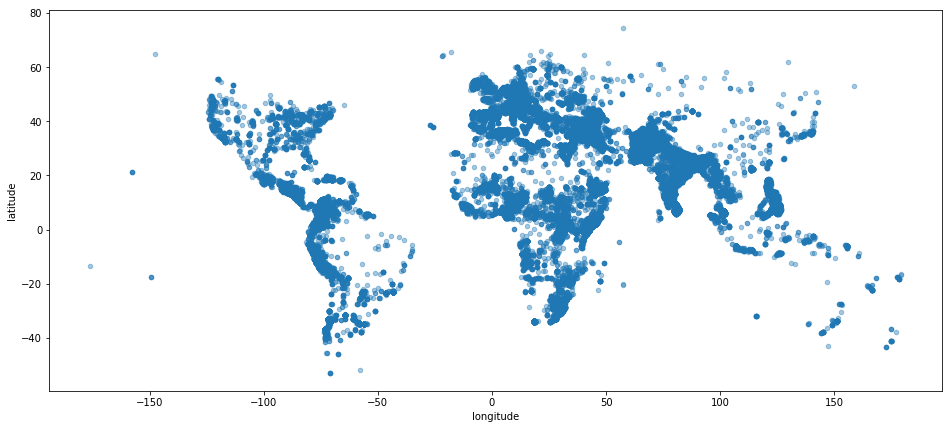

In [14]:
data.plot(kind= 'scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16,7))
plt.show()

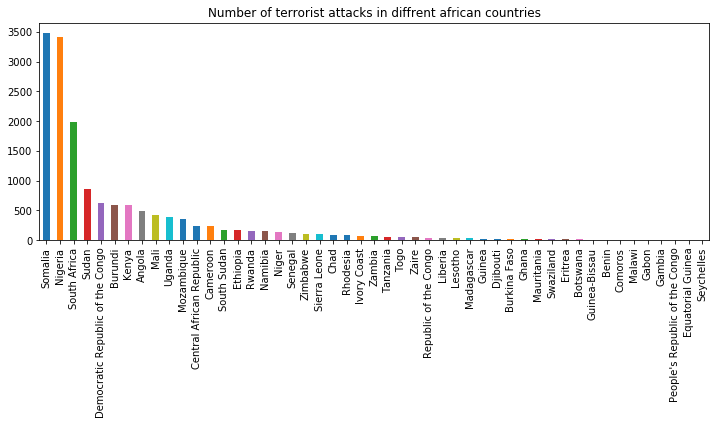

In [15]:
plt.rcParams["figure.figsize"] = (12,4)
df_africa["country_txt"].value_counts().plot(kind = "bar")
plt.title('Number of terrorist attacks in diffrent african countries')
plt.savefig('purchase_fre_job')

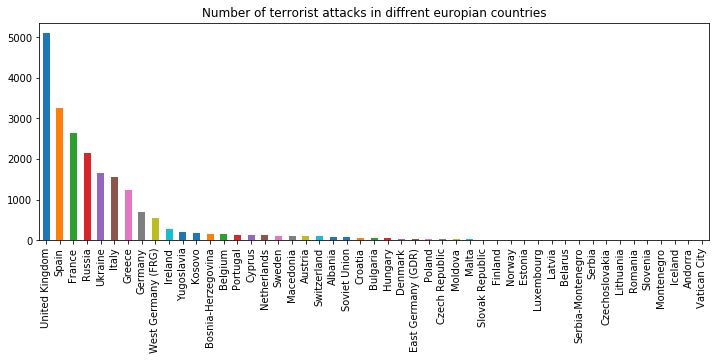

In [16]:
plt.rcParams["figure.figsize"] = (12,4)
df_europe["country_txt"].value_counts().plot(kind = "bar")
plt.title('Number of terrorist attacks in diffrent europian countries')
plt.savefig('purchase_fre_job')

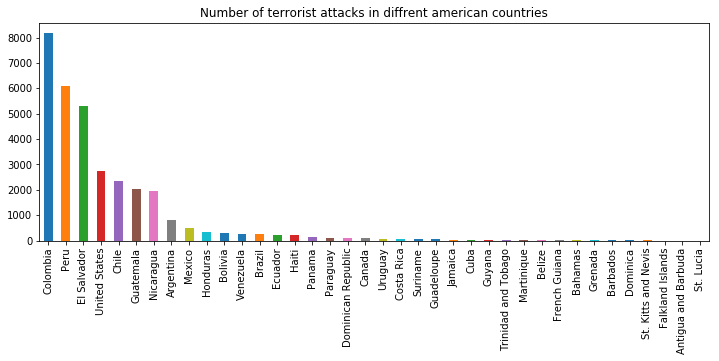

In [17]:
plt.rcParams["figure.figsize"] = (12,4)
df_america["country_txt"].value_counts().plot(kind = "bar")
plt.title('Number of terrorist attacks in diffrent american countries')
plt.savefig('purchase_fre_job')

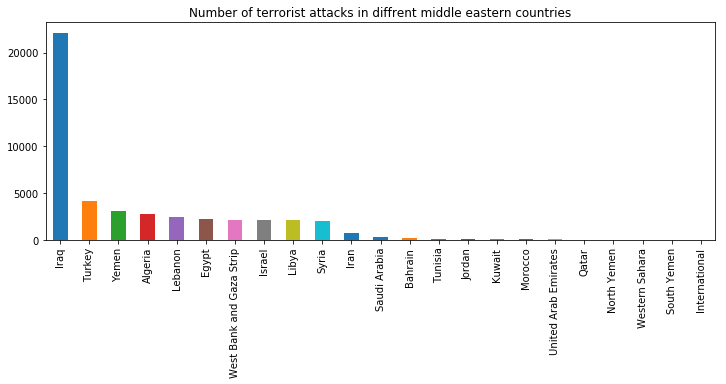

In [18]:
plt.rcParams["figure.figsize"] = (12,4)
df_middleeast["country_txt"].value_counts().plot(kind = "bar")
plt.title('Number of terrorist attacks in diffrent middle eastern countries')
plt.savefig('purchase_fre_job')

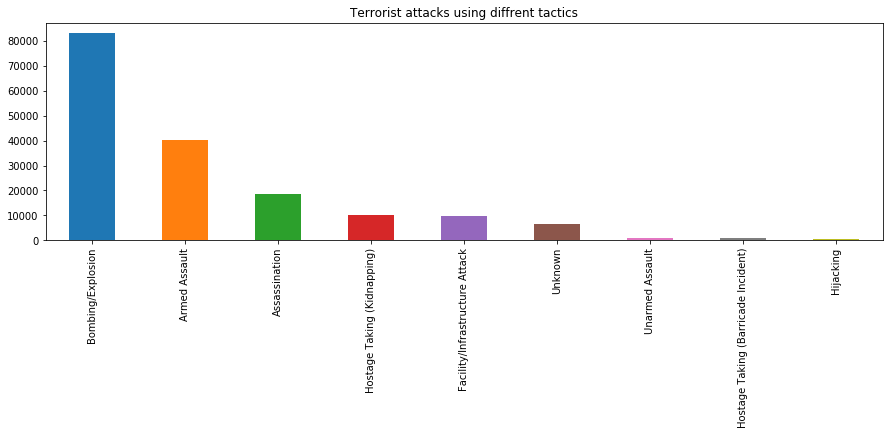

In [19]:
plt.rcParams["figure.figsize"] = (15,4)
data["attacktype1_txt"].value_counts().plot(kind = "bar")
plt.title('Terrorist attacks using diffrent tactics')
plt.savefig('purchase_fre_job')

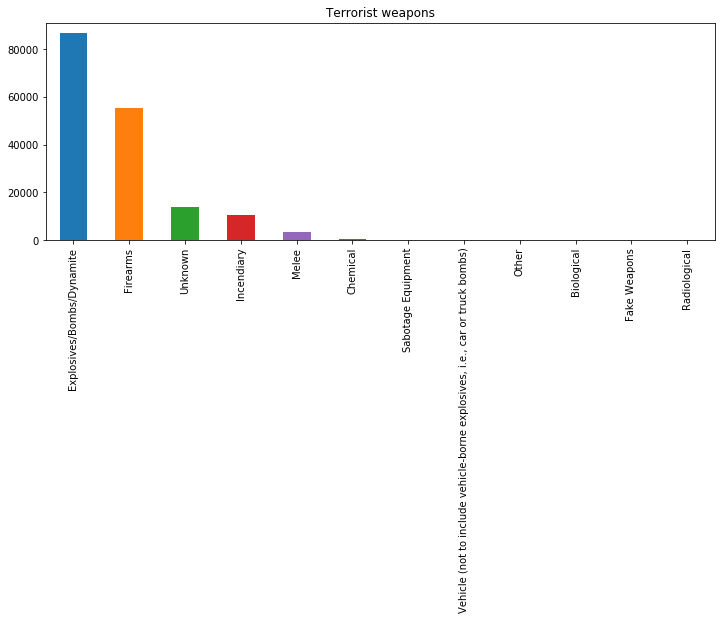

In [20]:
plt.rcParams["figure.figsize"] = (12,4)
data["weaptype1_txt"].value_counts().plot(kind = "bar")
plt.title('Terrorist weapons')
plt.savefig('purchase_fre_job')

AxesSubplot(0.125,0.125;0.775x0.755)


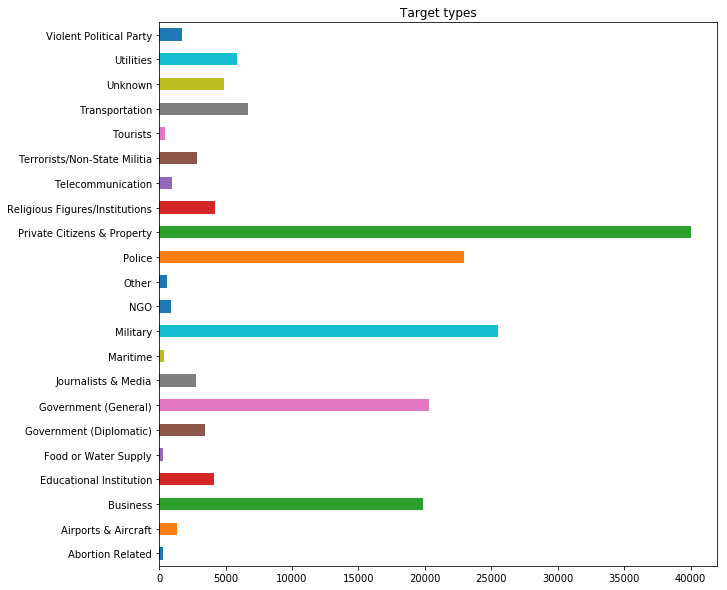

In [21]:
state = pd.DataFrame(data, columns = ['targtype1_txt']) 
count_states = state.stack().value_counts()
states = count_states.sort_index(axis=0, ascending=True)
print(states.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(10, 10), title='Target types'))

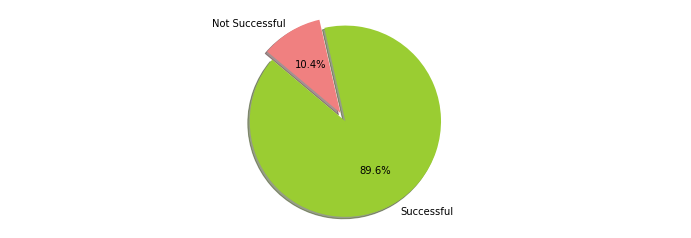

In [22]:
import matplotlib.pyplot as plt
 

labels = 'Successful', 'Not Successful'
sizes = [152701, 17649]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0) 
 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

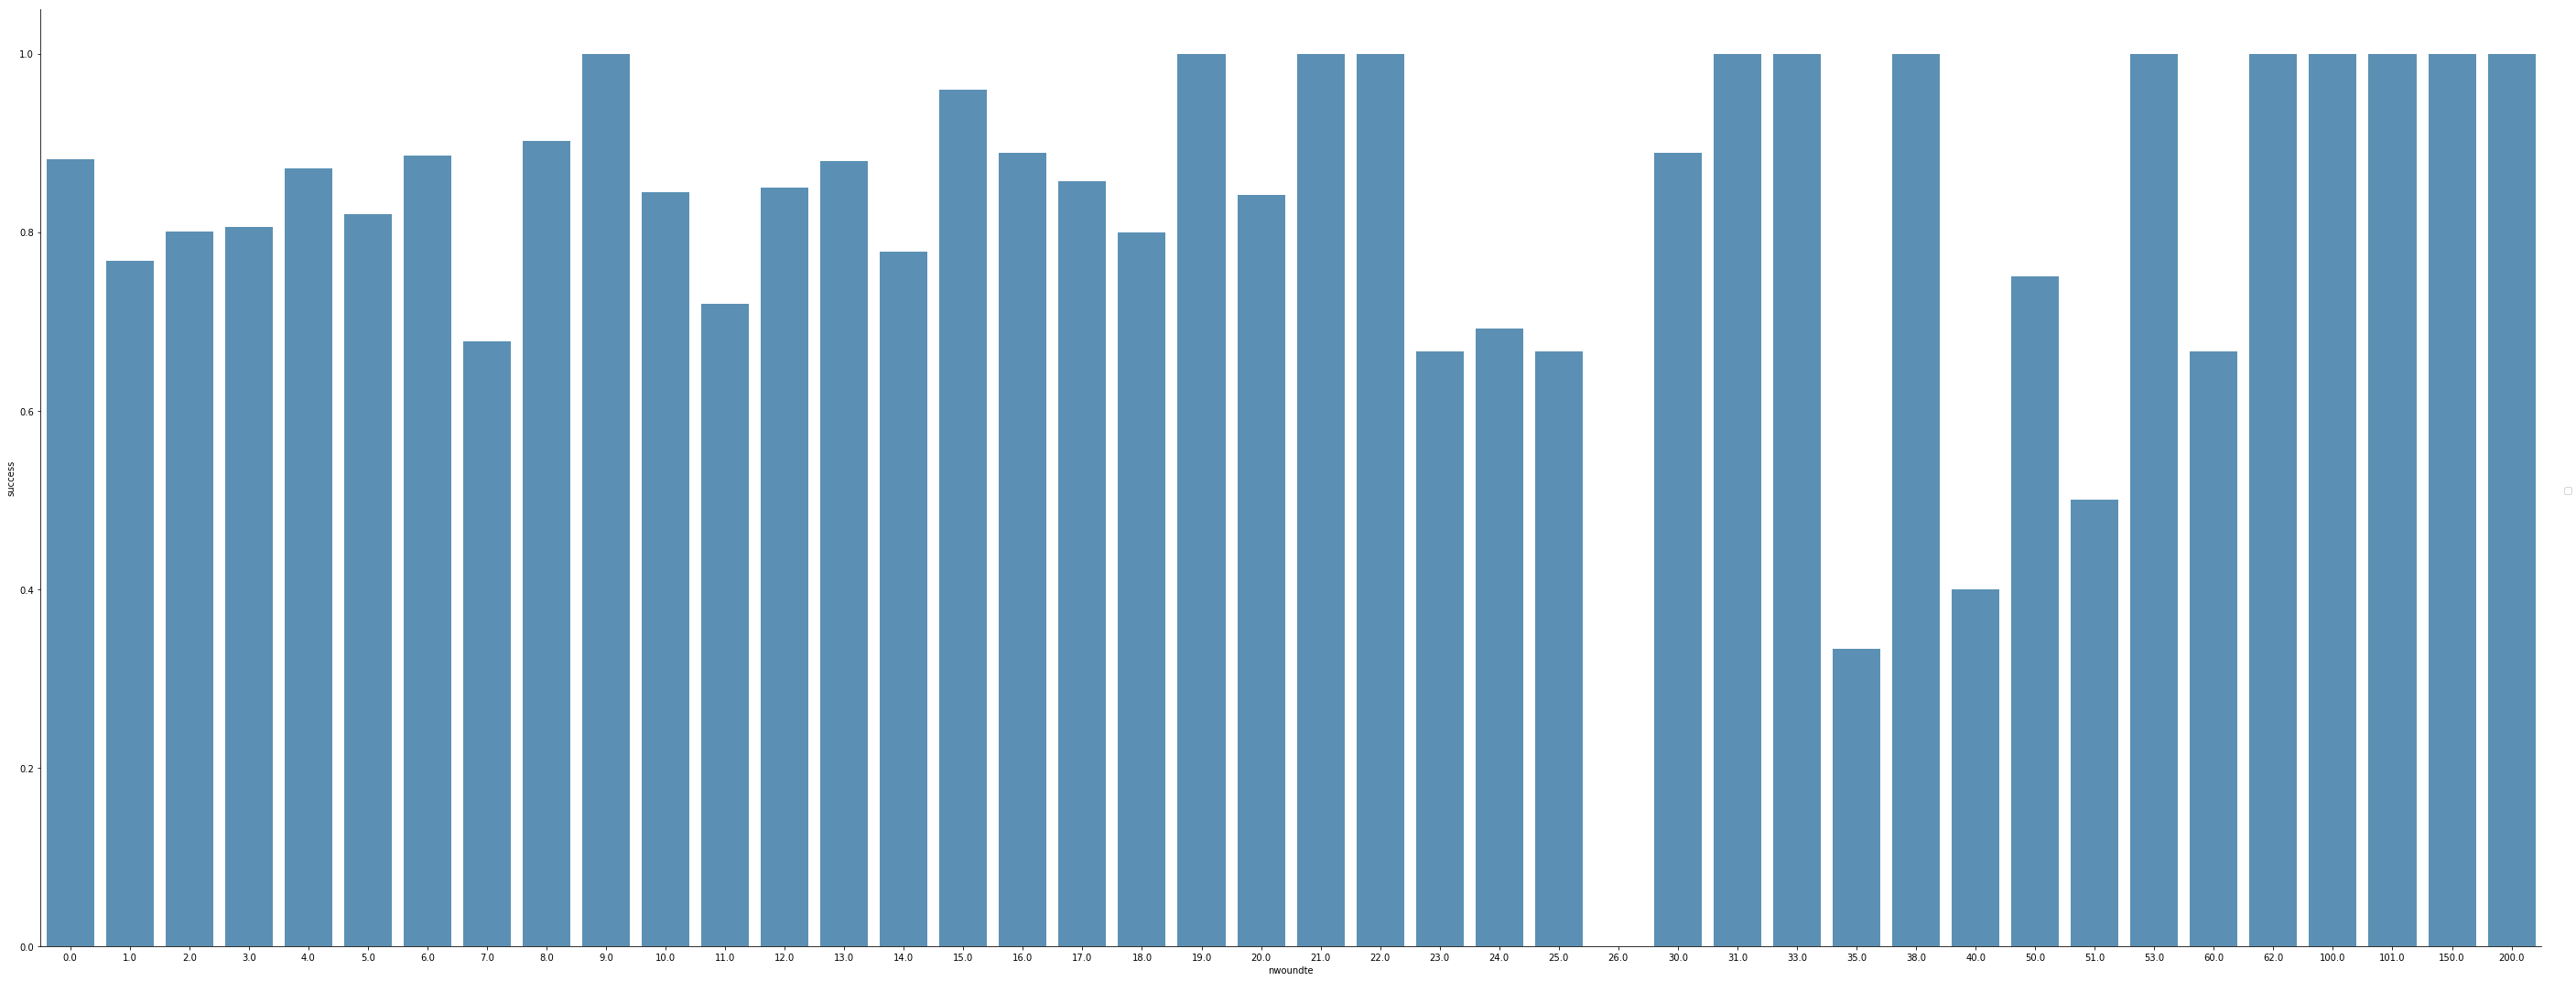

In [23]:
grid= sns.FacetGrid(data[['nwoundte', 'success']]. groupby(['nwoundte'], as_index=False).mean(),size=15,aspect=2.6)
grid.map(sns.barplot,'nwoundte','success',alpha=.8)
grid.add_legend()
plt.savefig('purchase_fre_job')

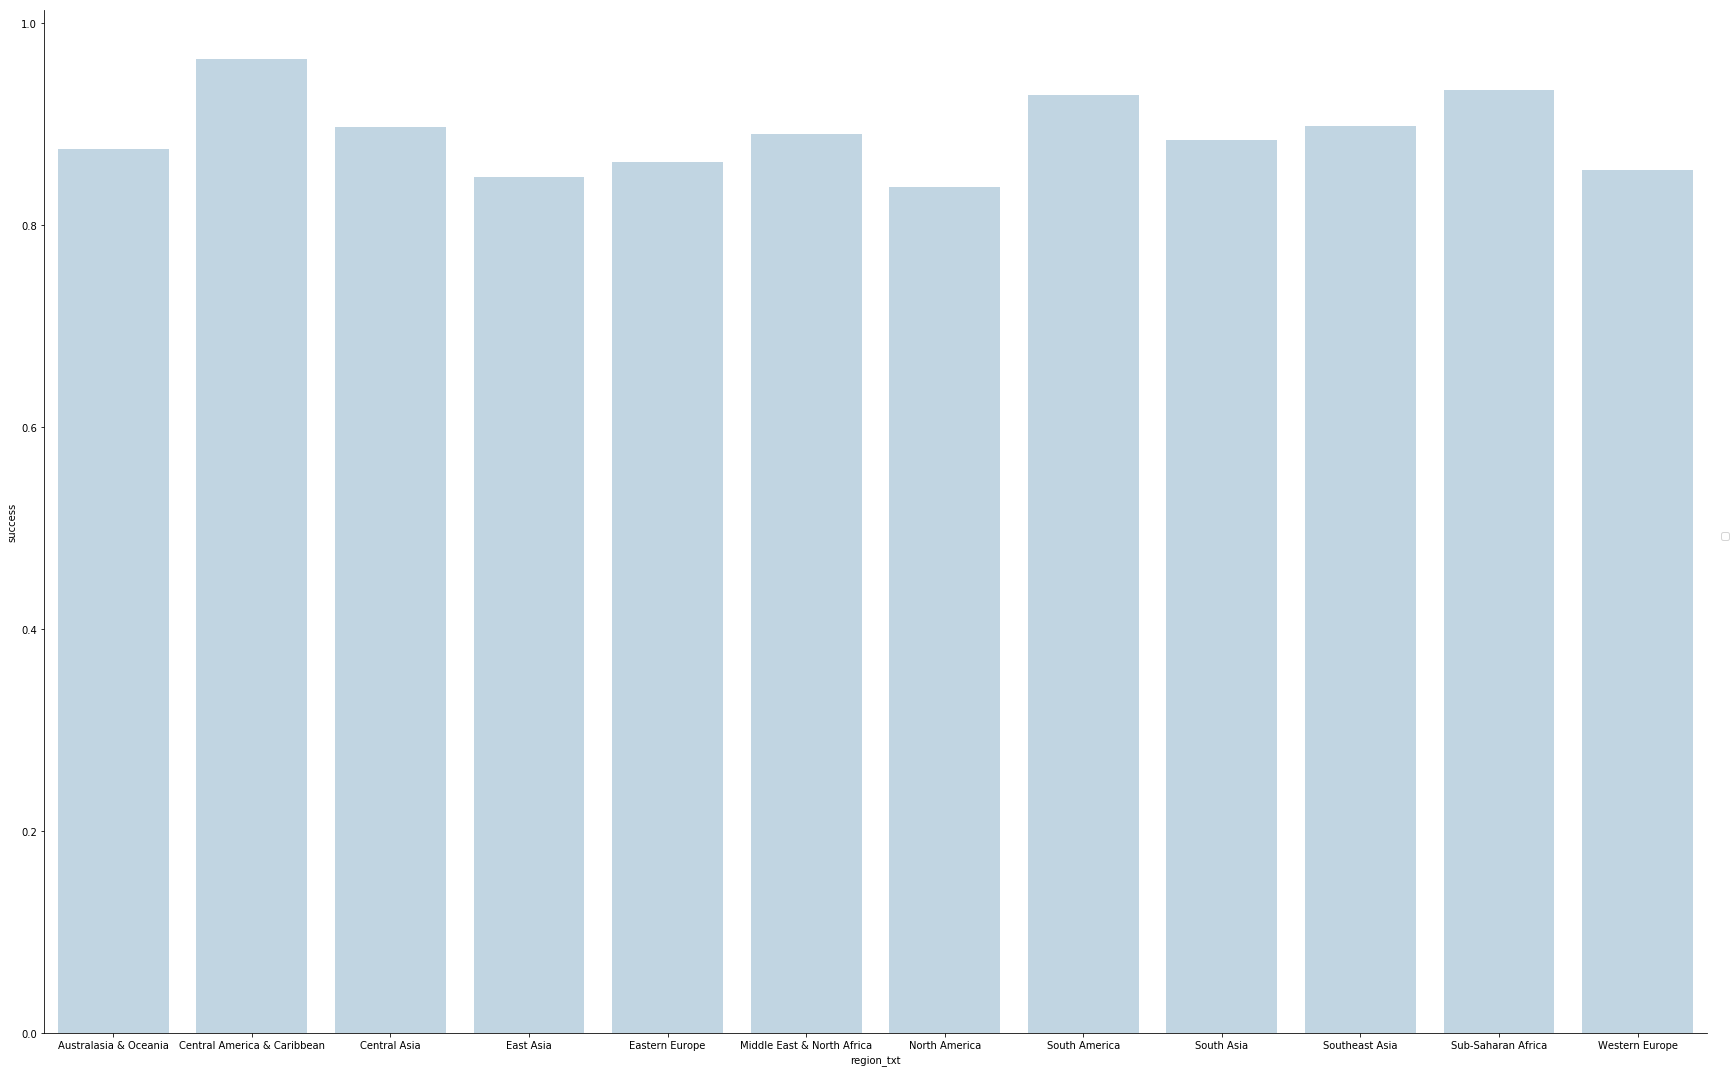

In [24]:
grid= sns.FacetGrid(data[['region_txt', 'success']]. groupby(['region_txt'], as_index=False).mean(),size=15,aspect=1.6)
grid.map(sns.barplot,'region_txt','success',alpha=.3)
grid.add_legend()
plt.savefig('purchase_fre_job')

# 2.Cleaning Data and viewing correlation between features

In [25]:
data = data.drop(['region', 'claimed', 'nkillter', 'nwound','nwoundte'], axis=1)  
data.head()

,iyear,imonth,iday,extended,country,country_txt,region_txt,latitude,longitude,multiple,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
0,1970,7,2,0,58,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,0,...,1,Assassination,14,Private Citizens & Property,58.0,Dominican Republic,0,13,Unknown,1.0
1,1970,0,0,0,130,Mexico,North America,19.432608,-99.133207,0,...,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),21.0,Belgium,0,13,Unknown,0.0
2,1970,1,0,0,160,Philippines,Southeast Asia,15.478598,120.599741,0,...,1,Assassination,10,Journalists & Media,217.0,United States,0,13,Unknown,1.0
3,1970,1,0,0,78,Greece,Western Europe,37.983773,23.728157,0,...,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,0,6,Explosives/Bombs/Dynamite,NaN
4,1970,1,0,0,101,Japan,East Asia,33.580412,130.396361,0,...,7,Facility/Infrastructure Attack,7,Government (Diplomatic),217.0,United States,0,8,Incendiary,NaN


In [26]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 175, 20 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 10 }
        )

we can easily observe the reddish square which indicate that there is high correlation between attacktype and weapon type also between nationality and countries


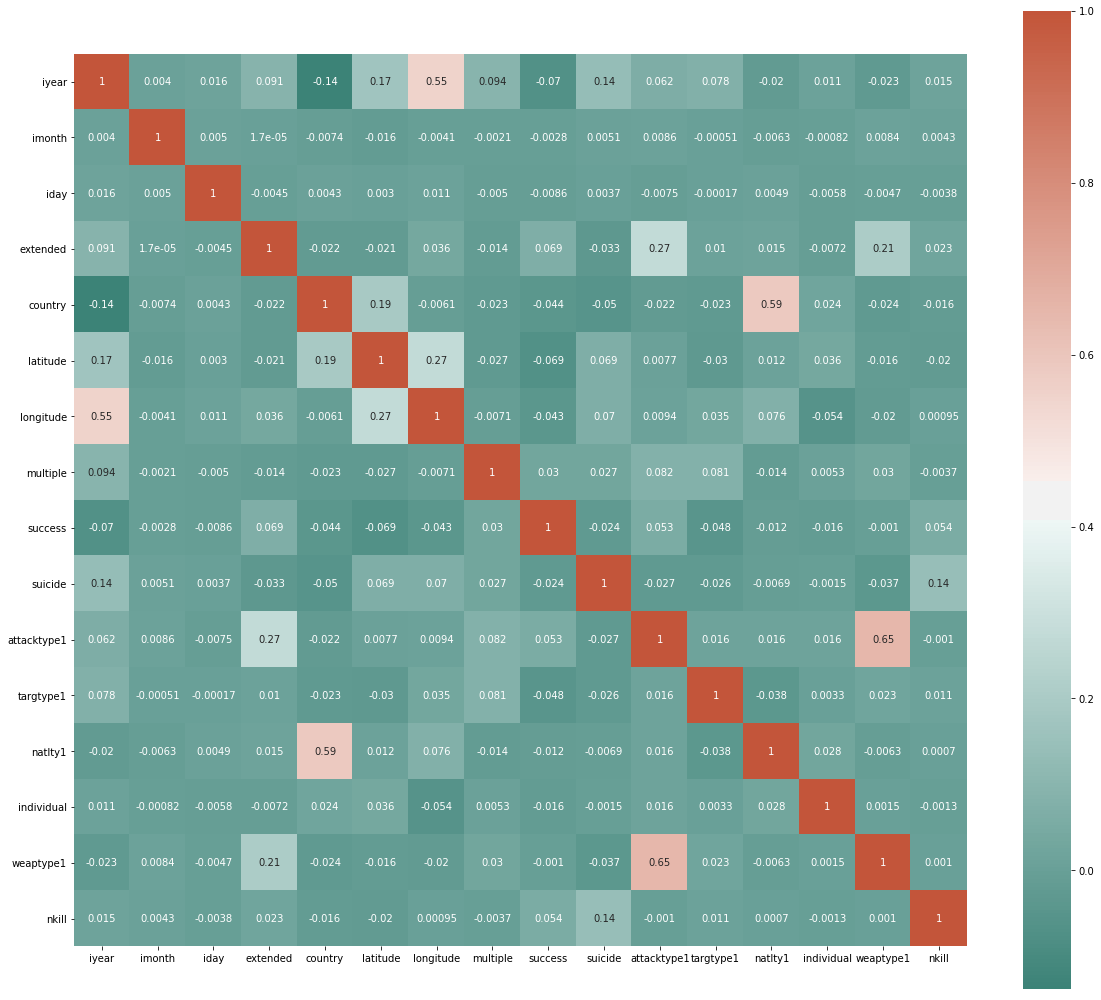

In [27]:
plot_correlation_map(data)
print("we can easily observe the reddish square which indicate that there is high correlation between attacktype and weapon type also between nationality and countries")

In [28]:
data['nkill'].fillna(0.686445, inplace=True)
data['latitude'].fillna(23.399774, inplace=True)
data['longitude'].fillna(26.350909, inplace=True)
data['natlty1'].fillna(167.954530, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 22 columns):
iyear              170350 non-null int64
imonth             170350 non-null int64
iday               170350 non-null int64
extended           170350 non-null int64
country            170350 non-null int64
country_txt        170350 non-null object
region_txt         170350 non-null object
latitude           170350 non-null float64
longitude          170350 non-null float64
multiple           170350 non-null int64
success            170350 non-null int64
suicide            170350 non-null int64
attacktype1        170350 non-null int64
attacktype1_txt    170350 non-null object
targtype1          170350 non-null int64
targtype1_txt      170350 non-null object
natlty1            170350 non-null float64
natlty1_txt        168956 non-null object
individual         170350 non-null int64
weaptype1          170350 non-null int64
weaptype1_txt      170350 non-null object
nkill           

# 3.Predicting whether a terrorist attack is successful or not using diffrent models

In [29]:
features = ['imonth','iday','extended',  'latitude', 'longitude', 'multiple','suicide','attacktype1',
            'targtype1', 'individual', 'weaptype1', 'nkill']

In [36]:
y = data['success']
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [37]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 3.1.LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy = {:.2f}'.format(logreg.score(X_test, y_test)))

             precision    recall  f1-score   support

          0       0.75      0.00      0.00      3462
          1       0.90      1.00      0.95     30608

avg / total       0.88      0.90      0.85     34070

Accuracy = 0.90


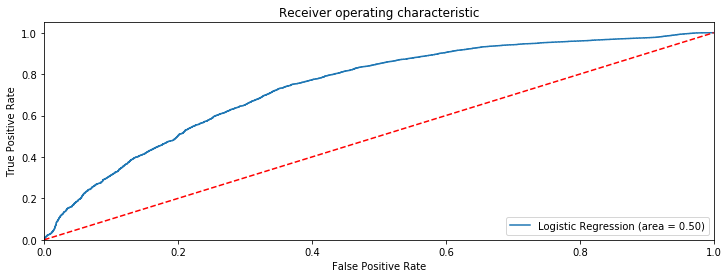

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [40]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=5)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.896


Confusion matrix
[[    3  3459]
 [    1 30607]]


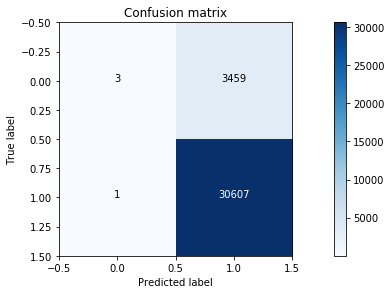

In [31]:
cnfe = confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cnfe,
                      title='Confusion matrix')
plt.show() 

# 3.2. KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy = ",accuracy_score(y_pred,y_test))

Accuracy =  0.902113296155


In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

In [33]:

cnf = confusion_matrix(y_test,y_pred)


Confusion matrix
[[  452  3010]
 [  325 30283]]


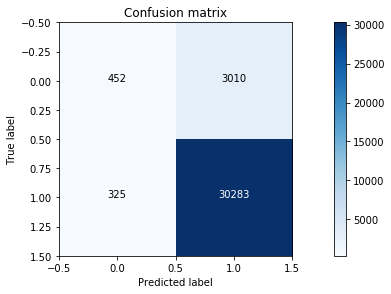

In [34]:

plt.figure()
plot_confusion_matrix(cnf,
                      title='Confusion matrix')
plt.show() 

# 3.3.Decision Tree Classifier

In [35]:
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)

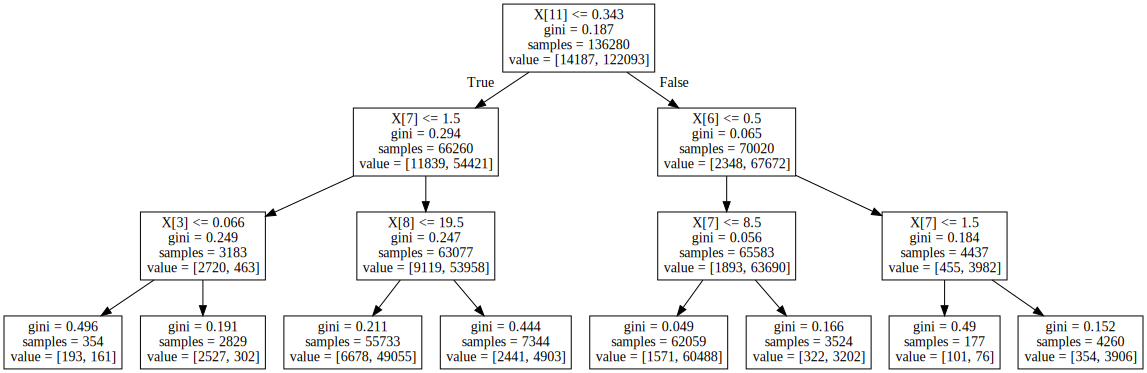

In [36]:
import graphviz 
dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data")
graph

In [37]:
from sklearn.metrics import accuracy_score
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))
print("Accuracy = ",accuracy_score(dtc_pred,y_test))

             precision    recall  f1-score   support

          0       0.84      0.21      0.33      3462
          1       0.92      1.00      0.95     30608

avg / total       0.91      0.92      0.89     34070

Accuracy =  0.915233343117


Confusion matrix
[[  712  2750]
 [  138 30470]]


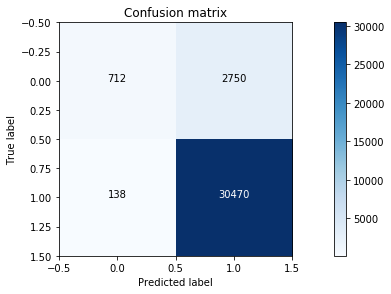

In [38]:

cnf1 = confusion_matrix(y_test,dtc_pred)
plt.figure()
plot_confusion_matrix(cnf1,
                      title='Confusion matrix')
plt.show() 

# 3.4. Random Forest Classifier

In [39]:
rfc = RandomForestClassifier(n_estimators=400) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))
print("accuracy = ",accuracy_score(rfc_pred,y_test))

             precision    recall  f1-score   support

          0       0.79      0.48      0.60      3462
          1       0.94      0.99      0.96     30608

avg / total       0.93      0.93      0.93     34070

accuracy =  0.934399765189


Confusion matrix
[[ 1667  1795]
 [  440 30168]]


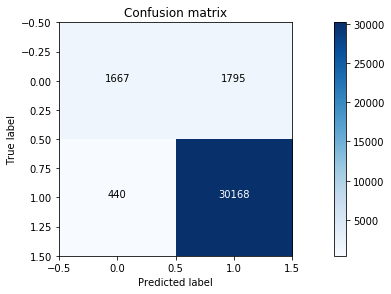

In [40]:

cnf2=confusion_matrix(y_test,rfc_pred)
plt.figure()
plot_confusion_matrix(cnf2,
                      title='Confusion matrix')
plt.show() 

# 4.Feature Importance

In [41]:
for name, score in zip(X_train[features], rfc.feature_importances_):
    print(name, score)

imonth 0.0890400619421
iday 0.132378658454
extended 0.00363446939362
latitude 0.188130663706
longitude 0.19171720724
multiple 0.0104344849044
suicide 0.0103135975966
attacktype1 0.104029598999
targtype1 0.133747010029
individual 0.00123489944318
weaptype1 0.0257137556349
nkill 0.109625592656


In [42]:
dat = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.01062,0.001047,0.003392,0.010422,0.021777,0.110076,0.105362,0.133867,0.083829,0.137432,0.187583,0.19033],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

dat = [dat]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=dat, layout=layout)
plot(fig)

'file://C:\\Users\\ASUS\\temp-plot.html'

In [43]:
features1=['weaptype1', 'nkill', 'attacktype1','targtype1', 'multiple', 'suicide',
       'imonth',  'iday', 'latitude',  'longitude','extended']

In [44]:
y1 = data['success']
X1 = data[features1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=30)

# 5.Enhanced Model 

In [45]:
rfc1 = RandomForestClassifier(n_estimators=400) 
rfc1 = rfc1.fit(X1_train, y1_train)
rfc_pred1 = rfc1.predict(X1_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y1_test,rfc_pred1))
print("accuracy = ",accuracy_score(rfc_pred1,y1_test))

             precision    recall  f1-score   support

          0       0.79      0.48      0.60      3462
          1       0.94      0.99      0.96     30608

avg / total       0.93      0.93      0.93     34070

accuracy =  0.934399765189


Confusion matrix
[[ 1674  1788]
 [  447 30161]]


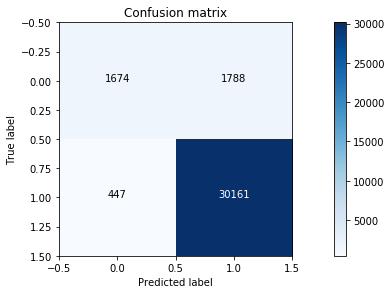

In [46]:

cnf3=confusion_matrix(y1_test,rfc_pred1)
plt.figure()
plot_confusion_matrix(cnf3,
                      title='Confusion matrix')
plt.show() 

# 6.Predicting the number of terrorist attacks in the upcoming years

In [47]:
data = data.dropna()
data.stack().value_counts()
years = pd.DataFrame(data, columns = ['iyear']) 
acts = years.stack().value_counts()
terroristact=pd.DataFrame(data=acts,columns=['acts'])
terroristact = terroristact.sort_index()

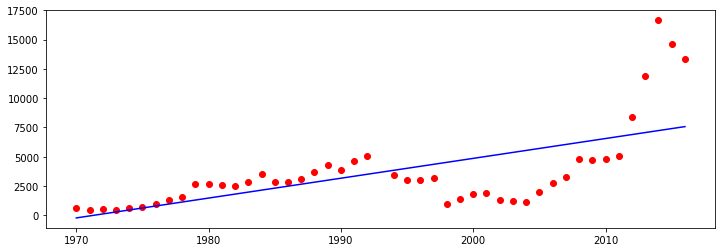

In [48]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
terroristact['year']=terroristact.index
X=terroristact['year'].values[:,np.newaxis]
y=terroristact['acts'].values
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y,color='r')
plt.plot(X, model.predict(X),color='b')
plt.show()

In [49]:
from sklearn.metrics import r2_score
print(r2_score(y,model.predict(X)))
print("we cannot predict the number of terrorist acts with high accuracy because it depends on many incontrolable variables such as the current state of a given country example at war or at peace")

0.410649415605
we cannot predict the number of terrorist acts with high accuracy because it depends on many incontrolable variables such as the current state of a given country example at war or at peace


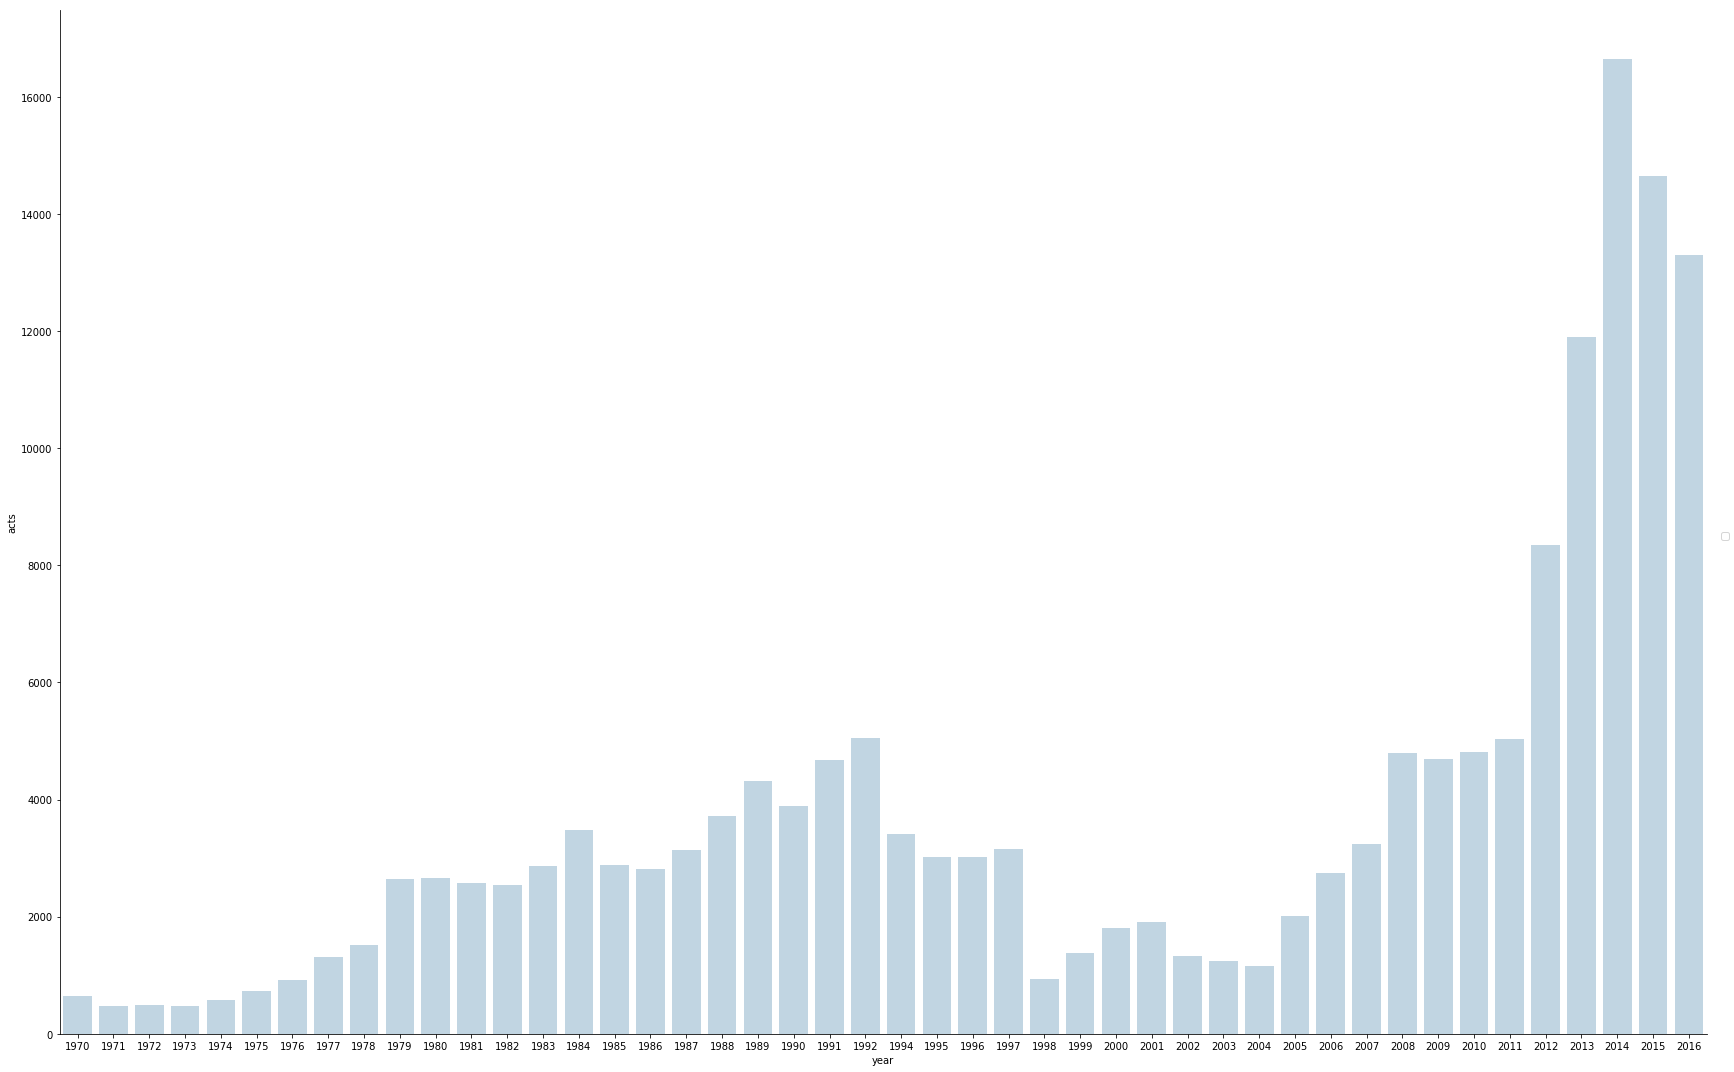

In [50]:
grid= sns.FacetGrid(terroristact[['year', 'acts']]. groupby(['year'], as_index=False).mean(),size=15,aspect=1.6)
grid.map(sns.barplot,'year','acts',alpha=.3)
grid.add_legend()
plt.savefig('purchase_fre_job')

# 7. Predicting th terrorist group after a given terrorist attack

In [51]:

features = [
    'longitude',
    'latitude',
    'targtype1',
    'natlty1',
    'attacktype1',
]
df = pd.read_csv('globalterrorismdb_shorter.csv',usecols= [
    'longitude',
    'latitude',
    'nkill',
    'gname',
    'natlty1',
    'targtype1',
    'weaptype1',
    'attacktype1',
],encoding = "ISO-8859-1")
df = df[df['gname'] != 'Unknown']


In [52]:
from sklearn import preprocessing
clf1= preprocessing.LabelEncoder()
encoderVname=clf1.fit(df.values[:,5])
IencoderVname = clf1.transform(encoderVname.classes_)
dict1= {}
for i in range(len(encoderVname.classes_)):
    dict1[encoderVname.classes_[i]]=IencoderVname[i]
df['gname']=df.gname.map(dict1)
df = df.dropna()


In [53]:
y2 = df['gname']
X2 = df[features]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=30)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X2_train, y2_train)
y_pred2 = knn.predict(X2_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y2_test,y_pred2))
print("Accuracy = ",accuracy_score(y_pred2,y2_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         0
          5       0.82      0.75      0.78        12
          6       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         0
         10       0.12      1.00      0.22         1
         12       0.00      0.00      0.00         1
         13       0.46      0.75      0.57         8
         18       0.00      0.00      0.00         0
         19       0.25      1.00      0.40         2
         20       0.00      0.00      0.00         1
         21       0.00      0.00      0.00         2
         22       0.00      0.00      0.00         1
         23       0.50      0.67      0.57         3
         24       0.00      0.00      0.00         1
         30       0.00      0.00      0.00         1
         32       0.00      0.00      0.00   